In [1]:
# install Pint
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 2.3 MB/s eta 0:00:00


In [2]:
# download modsim.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
import modsim as ms
from modsim import *

In [4]:
bikeshare = State(um=10, comedor=2)

""" función que lleva una sóla bici desde la um al comedor"""

def bike_hacia_comedor():
  print("Se movió una bici al comedor")
  bikeshare.um -= 1
  bikeshare.comedor += 1

""" función que lleva una sóla bici desde el comedor a la um"""

def bike_hacia_um():
  print("Se movió una bici a la UM")
  bikeshare.comedor -= 1
  bikeshare.um += 1

In [5]:
def step(p1,p2):
    if flip(p1):
        bike_hacia_um()

    if flip(p2):
        bike_hacia_comedor()

In [6]:
resultado = ms.TimeSeries()

for i in range(10):
    print(i)
    step(0.3, 0.5)
    resultado[i] = bikeshare.um

0
Se movió una bici al comedor
1
2
Se movió una bici al comedor
3
4
Se movió una bici al comedor
5
Se movió una bici al comedor
6
7
8
Se movió una bici a la UM
9
Se movió una bici a la UM


In [7]:
resultado

Time
0    9
1    9
2    8
3    8
4    7
5    6
6    6
7    6
8    7
9    8
Name: Quantity, dtype: int64

In [8]:
bikeshare

um         8
comedor    4
Name: state, dtype: int64

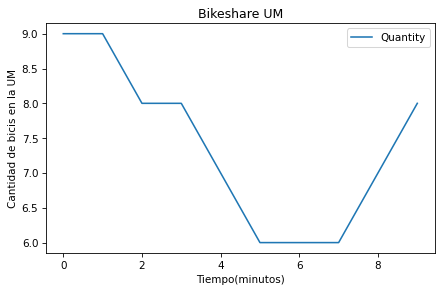

In [9]:
resultado.plot()
decorate(title= "Bikeshare UM", xlabel="Tiempo(minutos)", ylabel="Cantidad de bicis en la UM")

## Ejercicios

### Gráfico de UM y comedor

0
Se movió una bici al comedor
1
Se movió una bici al comedor
2
Se movió una bici a la UM
3
Se movió una bici al comedor
4
Se movió una bici al comedor
5
6
Se movió una bici al comedor
7
8
9
Se movió una bici al comedor


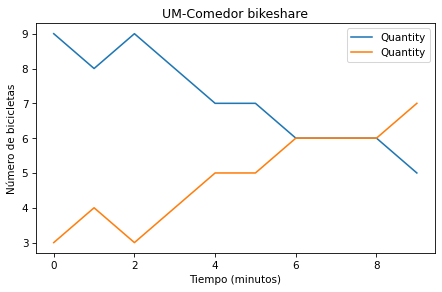

In [10]:
bikeshare = State(um=10, comedor=2)


def bike_hacia_comedor():
  """ función que lleva una sóla bici desde la um al comedor"""

  print("Se movió una bici al comedor")
  bikeshare.um -= 1
  bikeshare.comedor += 1


def bike_hacia_um():
  """ función que lleva una sóla bici desde el comedor a la um"""

  print("Se movió una bici a la UM")
  bikeshare.comedor -= 1
  bikeshare.um += 1


def step(p1,p2):
    if flip(p1):
        bike_hacia_um()

    if flip(p2):
        bike_hacia_comedor()

#Solución es crear un nuevo timeseries para los resultados de la cant de bicis en el comedo.
# Luego guardar los resultados dentro del for y plotearlos
um_result = TimeSeries()
comedor_result = TimeSeries() #acá

def simular(steps,p1, p2):
  for i in range(steps):
      print(i)
      step(p1, p2)
      um_result[i] = bikeshare.um
      comedor_result[i] = bikeshare.comedor #Acá
  return comedor_result, um_result



comedor_result, um_result = simular(10, 0.3, 0.5)
um_result.plot() #um_result, label="Bicis en la UM")
comedor_result.plot() #]comedor_result, label="Bicis en el Comedor")
decorate(title='UM-Comedor bikeshare',
         xlabel='Tiempo (minutos)',
         ylabel='Número de bicicletas')

### Definiendo la función de simulación

Qué pondrían dentro de la función que simula el comportamiento del sistema dentro del tiempo observado?

Simulación del sistema 
0
Se movió una bici a la UM
1
Se movió una bici a la UM
Se movió una bici al comedor
2
Se movió una bici a la UM
3
Se movió una bici al comedor
4
Se movió una bici al comedor
5
6
Se movió una bici a la UM
7
Se movió una bici al comedor
8
Se movió una bici a la UM
9
Se movió una bici al comedor
10
Se movió una bici al comedor
11
12
Se movió una bici al comedor
13
Se movió una bici al comedor
14
15
16
Se movió una bici al comedor
17
18
Se movió una bici al comedor
19
20
Se movió una bici a la UM
Se movió una bici al comedor
21
Se movió una bici al comedor
22
Se movió una bici a la UM
Se movió una bici al comedor
23
Se movió una bici a la UM
Se movió una bici al comedor
24
Se movió una bici a la UM
25
Se movió una bici a la UM
Se movió una bici al comedor
26
Se movió una bici al comedor
27
Se movió una bici al comedor
28
29
30
31
Se movió una bici al comedor
32
Se movió una bici al comedor
33
Se movió una bici a la UM
34
Se movió una bici a la UM
Se movió una bici 

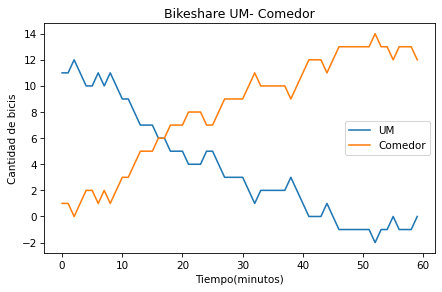

In [11]:
def bike_hacia_comedor(bikeshare):

  """ función que lleva una sóla bici desde la um al comedor  """
  print("Se movió una bici al comedor")
  bikeshare.um -= 1
  bikeshare.comedor += 1


def bike_hacia_um(bikeshare):
  """ función que lleva una sóla bici desde el comedor a la um"""
  print("Se movió una bici a la UM")
  bikeshare.comedor -= 1
  bikeshare.um += 1


def step(p1,p2):
    if flip(p1):
        bike_hacia_um(bikeshare)

    if flip(p2):
        bike_hacia_comedor(bikeshare)
#----  Acá  ----

def simular(p1,p2):
  print("Simulación del sistema ")
  for i in range(60):
    print(i)
    step(p1, p2)
    um_result[i] = bikeshare.um
    comedor_result[i] = bikeshare.comedor
  return um_result, comedor_result

um_result = TimeSeries()
comedor_result = TimeSeries()
bikeshare = State(um=10, comedor=2)

um, comedor = simular(0.33,0.5)
um.plot(label="UM") #um, label="UM")
comedor.plot(label="Comedor")#comedor, label="Comedor")
decorate(title= "Bikeshare UM- Comedor", xlabel="Tiempo(minutos)", ylabel="Cantidad de bicis")

# Modelado iterativo
Se comienza con planter un modelo simple y una solución simple de un sistema. Luego, se mejora u optimiza, agregando parámetros, funciones, etc.
AL identificar falencias en el código, errores, o situaciones no muy reales y plantear soluciones que las resuelvan y mejoren/faciliten la simulación del sistema y nuestro modelo. Estamos realizando un *modelado iterativo*.

1.   Nuestras probabilidades son iguales para todo momento.
2.   Bicis negativas.
3.   Se identifican los steps del sistema o pasos de manera instantánea, no consideramos el tiempo que tarda en el viaje y por ende, las bicis en viaje.


## Bicis negativas

Objetivo: lograr que la función que disminuye las bicis en los bicicleteros no siga restando cuando ya no queden bicis en el mismo.

In [12]:
bikeshare = State(um=5, comedor=7)

def bike_hacia_comedor():
  if bikeshare.um == 0:
    print("no quedan bicis disponibles")
  else:
    bikeshare.um -= 1
    bikeshare.comedor += 1
    print("Se movió una bici hacia el comedor")
  print(bikeshare)
  print()

In [13]:
for i in range(20):
  bike_hacia_comedor()

Se movió una bici hacia el comedor
um         4
comedor    8
Name: state, dtype: int64

Se movió una bici hacia el comedor
um         3
comedor    9
Name: state, dtype: int64

Se movió una bici hacia el comedor
um          2
comedor    10
Name: state, dtype: int64

Se movió una bici hacia el comedor
um          1
comedor    11
Name: state, dtype: int64

Se movió una bici hacia el comedor
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12
Name: state, dtype: int64

no quedan bicis disponibles
um          0
comedor    12


#Métricas

Cuán bien funciona el sistema de bicis compartidas?

Definir qué es "bien" y por parte de quién.


> *Cliente* --> Gestiona y mantiene el sistema de bicis

*   Minimizar el número de estudiantes que quieren usar una bici y no tienen disponible.
*   Maximizar el uso de bicis disponibles, es decir, minimizar las bicis sin uso (ociosas).

> *Usuario* --> Estudiante que usa la bici


*   Tener bicis disponibles siempre que las necesite.


Para evaluar y estudiar esto, necesitamos recolectar datos que nos den información o bien analizar datos que el modelo ya nos brinda.

*Usuario* ¿Cuántos usuarios insatisfechos tenemos?

Saber cuántos estudiantes quieren ir de un lado al otro y no pueden. Tendremos que "contar la cantidad de veces que el estudiante va al bicicletero y no hay bicis"

In [14]:
def bike_hacia_comedor(bikeshare):

  """ función que lleva una sóla bici desde la um al comedor  """
  if bikeshare.um == 0:
    bikeshare.um_vacio += 1
    print("Agrego uno al contador")
    return
  print("Se movió una bici al comedor")
  bikeshare.um -= 1
  bikeshare.comedor += 1

bikeshare = State(um=1, comedor=12, um_vacio = 0, comedor_vacio = 0)

bike_hacia_comedor(bikeshare) # um=0
bike_hacia_comedor(bikeshare) # um_vacio = 1
bike_hacia_comedor(bikeshare) # +1
bike_hacia_comedor(bikeshare) # +1
bikeshare


Se movió una bici al comedor
Agrego uno al contador
Agrego uno al contador
Agrego uno al contador


um                0
comedor          13
um_vacio          3
comedor_vacio     0
Name: state, dtype: int64

step:  0
Se movió una bici a la UM
step:  1
No hay bicis en el comedor
step:  2
No hay bicis en el comedor
step:  3
Se movió una bici al comedor
step:  4
Se movió una bici a la UM
El comedor quedó vacío: 2
La UM quedó vacía: 0
UM	 Time
0    11
1    11
2    11
3    10
4    11
Name: Quantity, dtype: int64 COMEDOR Time
0    0
1    0
2    0
3    1
4    0
Name: Quantity, dtype: int64
um               11
comedor           0
um_vacio          0
comedor_vacio     2
Name: state, dtype: int64


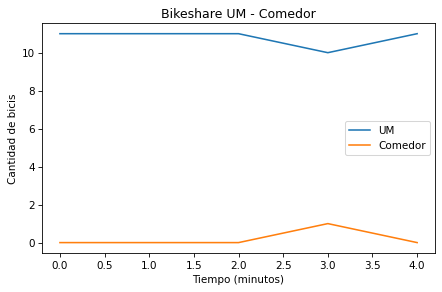

In [15]:
def bike_hacia_comedor(bikeshare):
  """ función que lleva una sóla bici desde la um al comedor  """
  if bikeshare.um == 0:
    bikeshare.um_vacio += 1
    print("No hay bicis en la UM")
    return
  print("Se movió una bici al comedor")
  bikeshare.um -= 1
  bikeshare.comedor += 1

def bike_hacia_um(bikeshare):
  """ función que lleva una sóla bici desde el comedor a la um"""
  if bikeshare.comedor == 0:
    bikeshare.comedor_vacio += 1
    print("No hay bicis en el comedor")
    return
  print("Se movió una bici a la UM")
  bikeshare.comedor -= 1
  bikeshare.um += 1

def step(p1,p2):
    if flip(p1):
        bike_hacia_comedor(bikeshare)
    if flip(p2):
        bike_hacia_um(bikeshare)

def simular(p1,p2):
  for i in range(5):
    print("step: ",i)
    step(p1, p2)
    um_result[i] = bikeshare.um
    comedor_result[i] = bikeshare.comedor
  return um_result, comedor_result


um_result = ms.TimeSeries()
comedor_result = ms.TimeSeries()

bikeshare = ms.State(um=10, comedor=1, um_vacio = 0, comedor_vacio = 0)
um, comedor = simular(0.2, 0.8)

#Mostramos la métrica:
print("El comedor quedó vacío:", bikeshare.comedor_vacio)
print("La UM quedó vacía:", bikeshare.um_vacio)
print("UM\t",um, "COMEDOR", comedor)
print(bikeshare)

#Gráficos
um_result.plot(label="UM")
comedor_result.plot(label="Comedor")
decorate(title= "Bikeshare UM - Comedor", xlabel="Tiempo (minutos)", ylabel="Cantidad de bicis")

# Barrido de parámetros de la simulación
¿Cómo afectan los parámetros a las métricas? Si la probabilidad aumenta, ¿tendremos la misma cantidad de alumnos disconformes?

```
simular(p1,p2,num_step):
    .....
    .....

```



In [16]:
linspace(0, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [17]:
def simular(estado, p1, p2, num_step):
  for i in range(num_step):
    step(estado, p1, p2)
    um_result[i] = estado.um
    comedor_result[i] = estado.comedor
  return estado

def bike_hacia_comedor(estado):
  """ función que lleva una sóla bici desde la um al comedor  """
  if estado.um == 0:
    estado.um_vacio += 1
    #print("No hay bicis en la um")
    return
  #print("Se movió una bici al comedor")
  estado.um -= 1
  estado.comedor += 1

def bike_hacia_um(estado):
  """ función que lleva una sóla bici desde el comedor a la um"""
  if estado.comedor == 0:
    estado.comedor_vacio += 1
    #print("No hay bicis en el comedor")
    return
  #print("Se movió una bici a la UM")
  estado.comedor -= 1
  estado.um += 1

def step(estado, p1, p2_array):
    if ms.flip(p1):
        bike_hacia_comedor(estado)

    if ms.flip(p2_array):
        bike_hacia_um(estado)

bikeshare = ms.State(um=10, comedor=2, um_vacio=0, comedor_vacio=0) #parám. iniciales
p2_array = ms.linspace(0, 1, 11)

#por cada probabilidad simulamos el sistema y observamos el estado final
for p2 in p2_array:
  estado = simular(bikeshare, 0.4, p2, 60) #la probabilidad de que un alumno use una bici desde el comedor (para ir a la um) es variable
  print("probabilidad p2: ", p2)
  print(" --------- ", bikeshare.um_vacio)
  print(estado)

probabilidad p2:  0.0
 ---------  23
um                0
comedor          12
um_vacio         23
comedor_vacio     0
Name: state, dtype: int64
probabilidad p2:  0.1
 ---------  42
um                0
comedor          12
um_vacio         42
comedor_vacio     0
Name: state, dtype: int64
probabilidad p2:  0.2
 ---------  60
um                1
comedor          11
um_vacio         60
comedor_vacio     0
Name: state, dtype: int64
probabilidad p2:  0.30000000000000004
 ---------  71
um                2
comedor          10
um_vacio         71
comedor_vacio     0
Name: state, dtype: int64
probabilidad p2:  0.4
 ---------  73
um                2
comedor          10
um_vacio         73
comedor_vacio     0
Name: state, dtype: int64
probabilidad p2:  0.5
 ---------  73
um               10
comedor           2
um_vacio         73
comedor_vacio     3
Name: state, dtype: int64
probabilidad p2:  0.6000000000000001
 ---------  73
um                9
comedor           3
um_vacio         73
comedor_vacio 

### Objeto para almacenar probabilidades con el estado resultante

SweepSeries()

Parameter
0.0      0
0.1      0
0.2      0
0.3      0
0.4      0
0.5      0
0.6      9
0.7     32
0.8     58
0.9     83
1.0    118
Name: Metric, dtype: int64


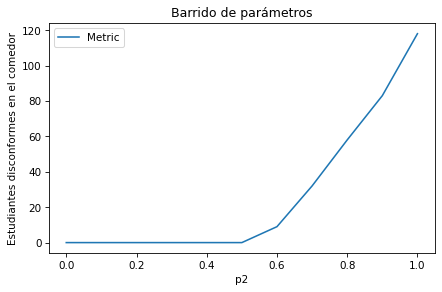

In [18]:
def simular(estado, p1, p2, num_step):
  for i in range(num_step):
    step(estado, p1, p2)
    um_result[i] = estado.um
    comedor_result[i] = estado.comedor
  return estado

def bike_hacia_comedor(estado):
  """ función que lleva una sóla bici desde la um al comedor  """
  if estado.um == 0:
    estado.um_vacio += 1
    #print("No hay bicis en la um")
    return
  #print("Se movió una bici al comedor")
  estado.um -= 1
  estado.comedor += 1

def bike_hacia_um(estado):
  """ función que lleva una sóla bici desde el comedor a la um"""
  if estado.comedor == 0:
    estado.comedor_vacio += 1
    #print("No hay bicis en el comedor")
    return
  #print("Se movió una bici a la UM")
  estado.comedor -= 1
  estado.um += 1

def step(estado, p1, p2_array):
    if flip(p1):
        bike_hacia_comedor(estado)

    if flip(p2_array):
        bike_hacia_um(estado)

bikeshare = State(um=10, comedor=2, um_vacio=0, comedor_vacio=0)
p2_array = ms.linspace(0, 1, 11)

sweep_p2 = ms.SweepSeries()


for p2 in p2_array:
  estado = simular(bikeshare, 0.4, p2, 60)
  sweep_p2[p2] = estado.comedor_vacio
  #print("probabilidad p2: ", p2)
print(sweep_p2)

sweep_p2.plot()
decorate(title="Barrido de parámetros", xlabel= "p2", ylabel="Estudiantes disconformes en el comedor")